In [ ]:
import fitsio as fio
import redmapper
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import h5py 
%matplotlib inline
import os.path

sns.set_theme()
sns.set_style("ticks")
sns.set(rc = {'figure.figsize':(15,8)})

: 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%run -i /global/project/projectdirs/des/zhou/spt_lensing/bin/plot_lambda_zeta.py

In [4]:
projection_depth_array = ["1","15","30","30_noperc","60"]

In [5]:
project_path = "/global/cfs/cdirs/des/zhou/spt_lensing/"
spt_path = project_path + "data/halos_spt.pkl"

In [6]:
richness_path_array = [None] * 5

for i,depth in enumerate(projection_depth_array):
    if depth == "30_no_perc":
        richness_path = os.path.abspath(r"/global/cfs/cdirs/des/zhou/spt_lensing/abacus/memHOD_11.2_12.4_0.65_1.0_0.2_0.0_0_z0p3_richness_d30_noperc.hdf5")
    else:
        richness_path = project_path + "abacus/memHOD_11.2_12.4_0.65_1.0_0.2_0.0_0_z0p3.richness_d{}.hdf5".format(str(depth))
    richness_path_array[i] = richness_path

In [7]:
d30_path = richness_path_array[2]

In [8]:
richness_bins=[5,10,14,20,30,45,60]
xi_bins = [5,10,20,30,40]

In [9]:
print(richness_path_array)

['/global/cfs/cdirs/des/zhou/spt_lensing/abacus/memHOD_11.2_12.4_0.65_1.0_0.2_0.0_0_z0p3.richness_d1.hdf5', '/global/cfs/cdirs/des/zhou/spt_lensing/abacus/memHOD_11.2_12.4_0.65_1.0_0.2_0.0_0_z0p3.richness_d15.hdf5', '/global/cfs/cdirs/des/zhou/spt_lensing/abacus/memHOD_11.2_12.4_0.65_1.0_0.2_0.0_0_z0p3.richness_d30.hdf5', '/global/cfs/cdirs/des/zhou/spt_lensing/abacus/memHOD_11.2_12.4_0.65_1.0_0.2_0.0_0_z0p3.richness_d30_noperc.hdf5', '/global/cfs/cdirs/des/zhou/spt_lensing/abacus/memHOD_11.2_12.4_0.65_1.0_0.2_0.0_0_z0p3.richness_d60.hdf5']


In [10]:
spt_df = pd.read_pickle(spt_path)
spt_df.reset_index()
spt_df.set_index("id",inplace=True)

# Combine SPT signal table and Richness table

In [11]:
def combine_spt_richness(projection_depth,spt_df):

    if depth == "30_no_perc":
        richness_path = os.path.abspath(r"/global/cfs/cdirs/des/zhou/spt_lensing/abacus/memHOD_11.2_12.4_0.65_1.0_0.2_0.0_0_z0p3_richness_d30_noperc.hdf5")
    else:
        richness_path = project_path + "abacus/memHOD_11.2_12.4_0.65_1.0_0.2_0.0_0_z0p3.richness_d{}.hdf5".format(str(depth))
    
    f = h5py.File(richness_path, 'r')
    
    halos = f['halos']
    
    column_names = ["gid","R_lambda_{}".format(projection_depth),"lambda_{}".format(projection_depth)]

    
    richness_df = pd.DataFrame(data=dict(zip(column_names,(halos['gid'],halos['R_lambda'],halos['lambda']))),)
    richness_df.set_index("gid",inplace=True)

    
    df = pd.merge(richness_df,spt_df,how="outer",right_index=True,left_index=True)
    
    print("Size of richness catalog:",len(richness_df))
    print("Size of SPT selected catalog:",len(spt_df))
    print("Size of union:",len(df))

    return(df)

In [12]:
df = combine_spt_richness(projection_depth_array[0],spt_df)

for depth in projection_depth_array[1:]:
    print(depth)
    df = combine_spt_richness(depth,df)
    print(df['lambda_{}'.format(depth)].mean())

Size of richness catalog: 2076502
Size of SPT selected catalog: 9103916
Size of union: 9186495
15
Size of richness catalog: 1997162
Size of SPT selected catalog: 9186495
Size of union: 9186495
4.348862654598936
30
Size of richness catalog: 1997162
Size of SPT selected catalog: 9186495
Size of union: 9186495
4.599252011315183
30_noperc
Size of richness catalog: 1997162
Size of SPT selected catalog: 9186495
Size of union: 9186495
5.877535393657218
60
Size of richness catalog: 2076502
Size of SPT selected catalog: 9186495
Size of union: 9345175
5.6887497304470065


In [13]:
df

,R_lambda_60,lambda_60,R_lambda_30_noperc,lambda_30_noperc,R_lambda_30,lambda_30,R_lambda_15,lambda_15,R_lambda_1,lambda_1,...,pos_y,pos_z,mean_ln_zeta,mean_ln_lambda,zeta,xi,xi_gt_45,xi_gt_5,zeta_gt_2,select
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,415.166016,856.251831,-8.618753,None,0.000188,4.178435,0.0,0.0,0.0,0.0
1,0.495934,3.0,0.525306,4.0,0.495934,3.0,0.495934,3.0,0.495934,3.0,...,414.536774,856.803711,-4.997203,None,0.006090,0.965050,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,415.929810,856.218750,-7.717088,None,0.000589,3.032619,0.0,0.0,0.0,0.0
3,0.525306,4.0,0.525306,4.0,0.525306,4.0,0.525306,4.0,0.525306,4.0,...,416.008942,856.025208,-6.653800,None,0.001281,2.686348,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,416.560669,855.756653,-8.724588,None,0.000172,1.018350,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,561.514404,888.496399,-9.094530,None,0.000094,1.446782,0.0,0.0,0.0,0.0
9859096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,560.016357,882.976013,-8.724588,None,0.000202,0.982131,0.0,0.0,0.0,0.0
9859099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,571.308411,854.020569,-8.961055,None,0.000121,3.074231,0.0,0.0,0.0,0.0
9859102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,564.850891,851.839539,-10.646326,None,0.000024,0.810190,0.0,0.0,0.0,0.0


In [14]:
#no mask
lambda_spt_combined_path="data/lambda_spt_combined.pkl"
df.to_pickle(os.path.join(project_path,lambda_spt_combined_path))

# Add $<\ln \lambda | M_{500c},z>$

Add mean_ln_lambda from richness-mass relation from Saro et. al. 2015

$\begin{aligned}
\left\langle\ln \lambda \mid M_{500}, z\right\rangle=& \ln A_{\lambda}+B_{\lambda} \ln \left(\frac{M_{500}}{3 \times 10^{14} h^{-1} \mathrm{M}_{\odot}}\right) \\
&+C_{\lambda} \ln \left(\frac{E(z)}{E(z=0.6)}\right)
\end{aligned}$

In [15]:
halo_df = df[(~np.isnan(df['lambda_30']))&(~np.isnan(df['M500c']))]
halo_df = halo_df[halo_df['zeta_gt_2']==1]
print(len(halo_df))

1404


In [16]:
assert ~np.any(np.isnan(halo_df['pos_x']))

In [17]:
assert ~np.any(np.isnan(halo_df['lambda_30']))
assert ~np.any(np.isnan(halo_df['M500c']))

In [18]:
from colossus.cosmology import cosmology
h = 0.6726
params = {'flat' : True, 'H0' : 67.26,  'Om0' : 0.14212/h**2, 'Ob0' : 0.02222/h**2, 'sigma8' : 0.81, 'ns' : 9.9652, 'w0' : -1.0, 'Neff' : 3.04}
cosmo = cosmology.setCosmology('Abacus',params)
print(cosmo)
h_70 = cosmo.H0/70

Cosmology "Abacus" 
    flat = True, Om0 = 0.3142, Ode0 = 0.6858, Ob0 = 0.0491, H0 = 67.26, sigma8 = 0.8100, ns = 9.9652
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0400, powerlaw = False


In [19]:
A_lambda = 66.1
B_lambda = 1.14
C_lambda = 0.73
D_lambda = 0.16
growth_ratio = np.log(cosmo.Ez(0.3)/cosmo.Ez(0.6))

In [20]:
import scipy as sp

In [21]:
def get_mean_ln_lambda(M,A_lambda_,B_lambda_,C_lambda_):
    mean_ln_lambda = np.log(A_lambda_) + B_lambda_*np.log(M*h_70/3E14) + C_lambda_*growth_ratio
    return(mean_ln_lambda)

In [22]:
p0 = 60, 1, 0.5
best_fit = sp.optimize.curve_fit(get_mean_ln_lambda, halo_df['M500c'].to_numpy(),np.log(halo_df['lambda_30'].to_numpy()), p0)
print(best_fit)
best_fit_params = best_fit[0]
print("A,B,C are ", best_fit[0])

(array([33.83401608,  0.4820774 ,  1.95572013]), array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]]))
A,B,C are  [33.83401608  0.4820774   1.95572013]


In [23]:
halo_df['mean_ln_lambda_30'] = get_mean_ln_lambda(halo_df['M500c'],*best_fit_params)

In [24]:
halo_df_path = "data/lambda_spt_combined_30_zgt_2.pkl"
halo_df.to_pickle(os.path.join(project_path,halo_df_path))

In [25]:
from astropy import constants
M_sun = constants.M_sun.value

In [26]:
halo_df['M500c']

107        3.700427e+14
273        4.593285e+14
329        4.879248e+14
466        8.198132e+14
582        7.121884e+14
               ...     
9250915    2.793193e+14
9250915    2.793193e+14
9250915    2.793193e+14
9250915    2.793193e+14
9252098    2.415535e+14
Name: M500c, Length: 1404, dtype: float32

In [27]:
M500c_range = np.linspace(halo_df['M500c'].min(),halo_df['M500c'].max(),10000)
mean_ln_lambda = get_mean_ln_lambda(M500c_range,*best_fit_params)
print(mean_ln_lambda)

[2.94779283 2.94805381 2.94831464 ... 3.84367552 3.84371622 3.84375692]


In [28]:
print(M500c_range)

[1.97260265e+14 1.97367080e+14 1.97473896e+14 ... 1.26509608e+15
 1.26520290e+15 1.26530971e+15]


In [29]:
import matplotlib as mpl
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=halo_df['zeta_gt_2'].min(),vmax=halo_df['zeta'].max())
from matplotlib.lines import Line2D

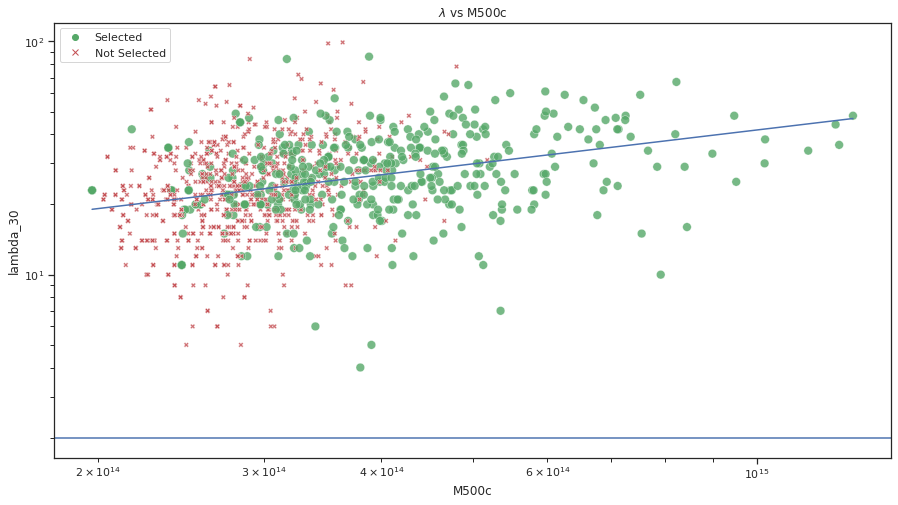

In [31]:
sns.set_style('ticks')
markers = {1: "o", 0: "X"}

plot2 = sns.lineplot(M500c_range, np.exp(mean_ln_lambda))
plot1 = sns.scatterplot(x='M500c',y='lambda_30',data=halo_df,size="select",sizes=(75,25),alpha=0.8,hue="select",palette=["r","g"],style="select",markers=markers,legend=False)

plot1.set(xscale="log",yscale="log",title="$\lambda$ vs M500c")
custom = [Line2D([], [], marker='o', color='g', linestyle='None'),
          Line2D([], [], marker='x', color='r', linestyle='None')]

plot1.axhline(2)
plt.legend(custom, ['Selected', 'Not Selected'], loc='upper left')
# plt.text(0.8*1E11,2.5, "z>2 line to exclude $M < 10^{12}$", color='black')

plt.show()